# Wine Quality Prediction

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter("ignore")

In [14]:
# loading the data
df = pd.read_csv("C:/Users/Rohit Gupta/Downloads/WineQT.csv")

In [15]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [16]:
print(df.shape)

(1143, 13)


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [18]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [19]:
# Checking for missing values
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


### Dataset doesn't contain any null values

In [20]:
# 1. Classifier Models

# Separate features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, rf_predictions))

# Stochastic Gradient Descent Classifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
sgd_predictions = sgd_classifier.predict(X_test)
print("Stochastic Gradient Descent Classifier Accuracy:", accuracy_score(y_test, sgd_predictions))

# Support Vector Classifier
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
svc_predictions = svc_classifier.predict(X_test)
print("Support Vector Classifier Accuracy:", accuracy_score(y_test, svc_predictions))

# 2. Chemical Qualities
print("\nChemical Qualities Correlation:")
corr = df.corr()['quality'].sort_values(ascending=False)
print(corr)

Random Forest Classifier Accuracy: 0.7030567685589519
Stochastic Gradient Descent Classifier Accuracy: 0.2096069868995633
Support Vector Classifier Accuracy: 0.49344978165938863

Chemical Qualities Correlation:
quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


### Random Forest Classifier is performing better than the other two classifiers in terms of accuracy. Alcohol, sulphates, and citric acid have a positive impact on wine quality, while volatile acidity, total sulfur dioxide, density, and chlorides have a negative impact. Among these, alcohol has the strongest positive correlation, and volatile acidity has the strongest negative correlation with wine quality. The below are the visualizations showing the same..

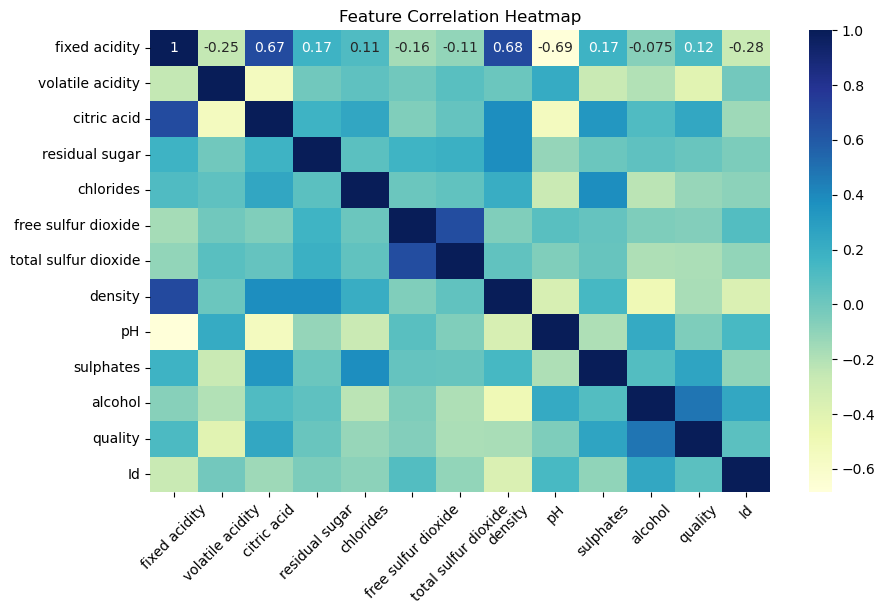

In [43]:
# 3. Data Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation = 45) 
plt.show()

### The above heatmap is showing the correlation of features with each other.

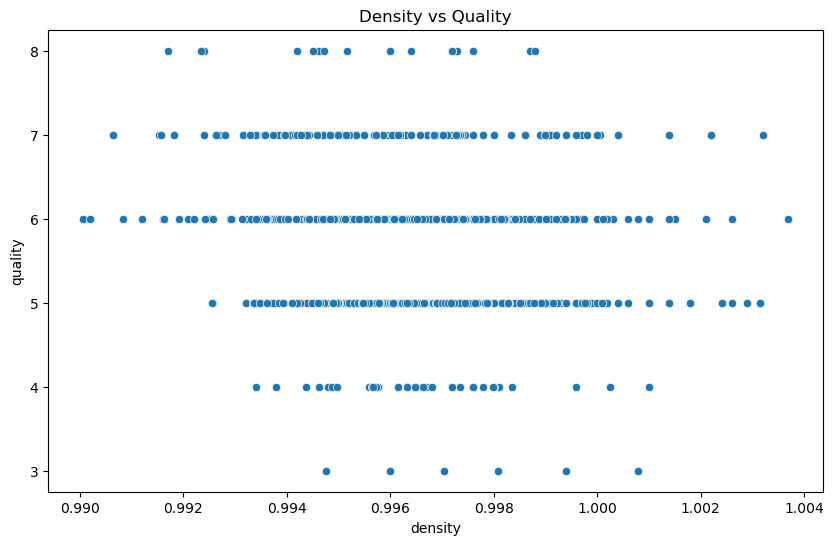

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='quality', data=df)
plt.title("Density vs Quality")
plt.show()

### There seems to be no clear linear or non-linear relationship between density and quality. The data points are scattered randomly across the plot, indicating that density alone may not be a strong predictor of wine quality.

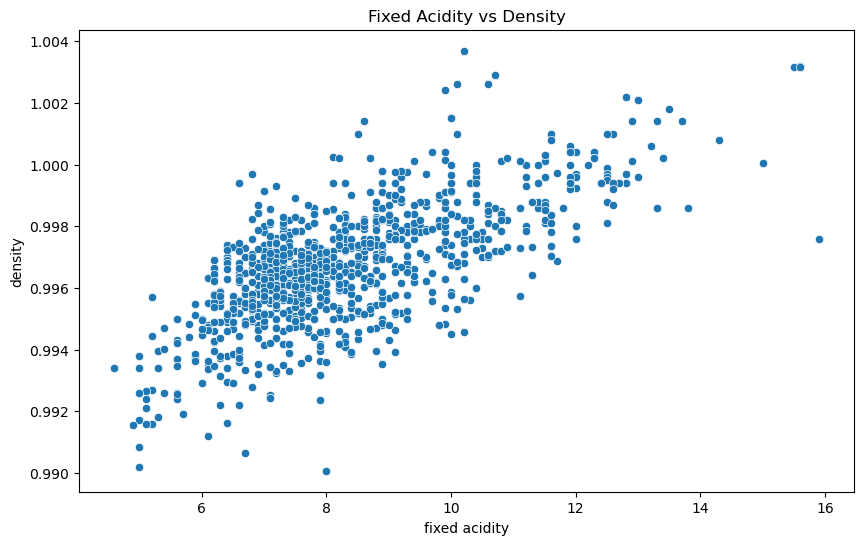

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fixed acidity', y='density', data=df)
plt.title("Fixed Acidity vs Density")
plt.show()

### There appears to be an inverse or negative relationship between fixed acidity and density. As the fixed acidity increases, the density tends to decrease, and vice versa.

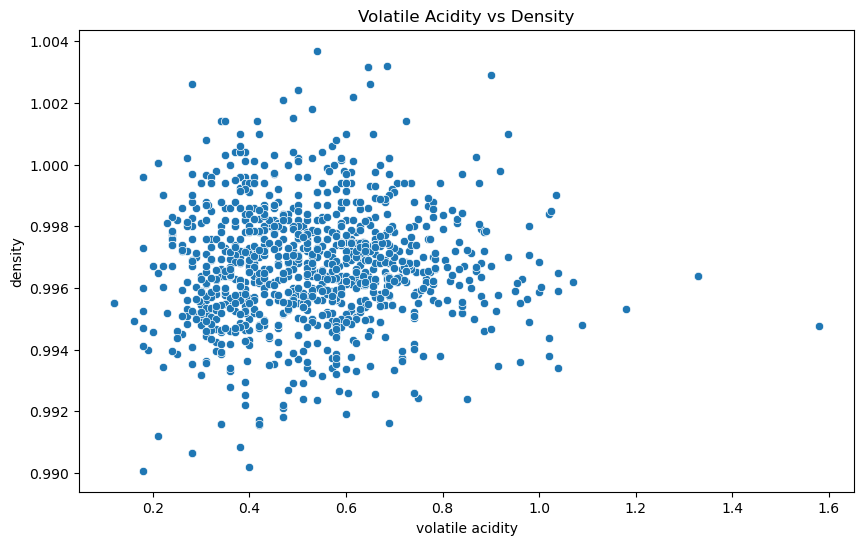

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='volatile acidity', y='density', data=df)
plt.title("Volatile Acidity vs Density")
plt.show()

### There appears to be an inverse or negative relationship between volatile acidity and density. As volatile acidity increases, the density tends to decrease, and vice versa.